In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("world_happiness.xlsx")

In [3]:
rename_dict = {
    "Year": "Year",
    "Rank": "Rank",
    "Country name": "Country",
    "Ladder score": "Ladder Score",
    "upperwhisker": "Upperwhisker",
    "lowerwhisker": "Lowerwhisker",
    "Explained by: Log GDP per capita": "Log GDP per capita",
    "Explained by: Social support": "Social support",
    "Explained by: Healthy life expectancy": "Healthy life expectancy",
    "Explained by: Freedom to make life choices": "Freedom to make life choices",
    "Explained by: Generosity": "Generosity",
    "Explained by: Perceptions of corruption": "Perceptions of corruption",
    "Dystopia + residual": "Dystopia + residual"
}

In [4]:
dataset = dataset.rename(columns=rename_dict)

In [5]:
dataset_2024 = dataset[(dataset["Year"] == 2024)]
dataset_2024

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,2024,143,Zimbabwe,3.396,3.509,3.283,0.827,0.961,0.178,0.598,0.065,0.131,0.636
1918,2024,144,Malawi,3.260,3.390,3.130,0.588,0.489,0.280,0.677,0.115,0.136,0.975
1931,2024,145,Lebanon,3.188,3.277,3.098,1.223,0.984,0.440,0.279,0.071,0.041,0.150
1943,2024,146,Sierra Leone,2.998,3.102,2.894,0.786,0.692,0.327,0.613,0.138,0.052,0.391


Top 10 Happiest Countires in the World!

In [6]:
dataset_top = dataset_2024.sort_values("Ladder Score", ascending=False).head(10)
dataset_top

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
71,2024,6,Costa Rica,7.274,7.361,7.187,1.492,1.600,0.680,0.948,0.067,0.118,2.369
84,2024,7,Norway,7.262,7.353,7.171,1.902,1.711,0.863,0.962,0.168,0.425,1.231
97,2024,8,Israel,7.234,7.301,7.168,1.695,1.743,0.824,0.740,0.144,0.193,1.895
109,2024,9,Luxembourg,7.122,7.213,7.031,2.028,1.558,0.864,0.931,0.117,0.397,1.227
122,2024,10,Mexico,6.979,7.068,6.889,1.435,1.504,0.550,0.879,0.057,0.118,2.438


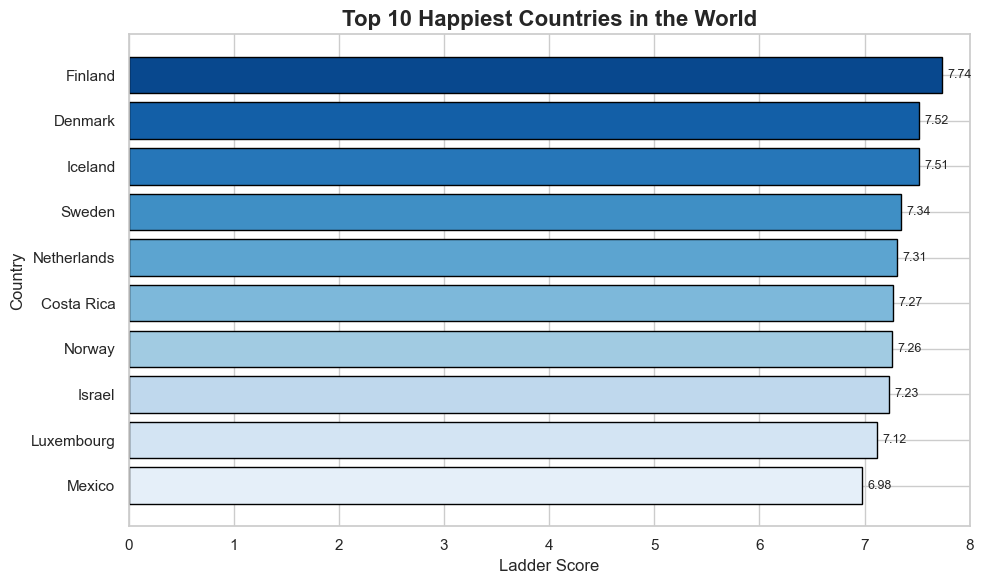

In [7]:
sns.set_theme(style="whitegrid")
colors = sns.color_palette("Blues_r", len(dataset_top))
plt.figure(figsize=(10, 6))

bars = plt.barh(dataset_top["Country"], dataset_top["Ladder Score"], color=colors, edgecolor="black")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.title("Top 10 Happiest Countries in the World", fontsize=16, weight='bold')

plt.xlabel("Ladder Score", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xlim(0, 8)


plt.tight_layout()
plt.show()

Top 10 Saddest Countries in the World!

In [8]:
dataset_bottom = dataset_2024.sort_values("Ladder Score", ascending=True).head(10)
dataset_bottom

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1956,2024,147,Afghanistan,1.364,1.427,1.301,0.649,0.000,0.155,0.000,0.075,0.135,0.348
1943,2024,146,Sierra Leone,2.998,3.102,2.894,0.786,0.692,0.327,0.613,0.138,0.052,0.391
1931,2024,145,Lebanon,3.188,3.277,3.098,1.223,0.984,0.440,0.279,0.071,0.041,0.150
1918,2024,144,Malawi,3.260,3.390,3.130,0.588,0.489,0.280,0.677,0.115,0.136,0.975
1905,2024,143,Zimbabwe,3.396,3.509,3.283,0.827,0.961,0.178,0.598,0.065,0.131,0.636
1892,2024,142,Botswana,3.438,3.576,3.301,1.388,1.146,0.094,0.697,0.018,0.083,0.012
1879,2024,141,DR Congo,3.469,3.608,3.331,0.544,0.929,0.278,0.600,0.151,0.061,0.906
1866,2024,140,Yemen,3.561,3.714,3.408,0.631,1.482,0.375,0.447,0.066,0.106,0.454
1853,2024,139,Comoros,3.754,3.919,3.590,0.835,0.501,0.428,0.260,0.117,0.164,1.450
1840,2024,138,Lesotho,3.757,3.957,3.558,0.737,1.131,0.000,0.606,0.065,0.072,1.145


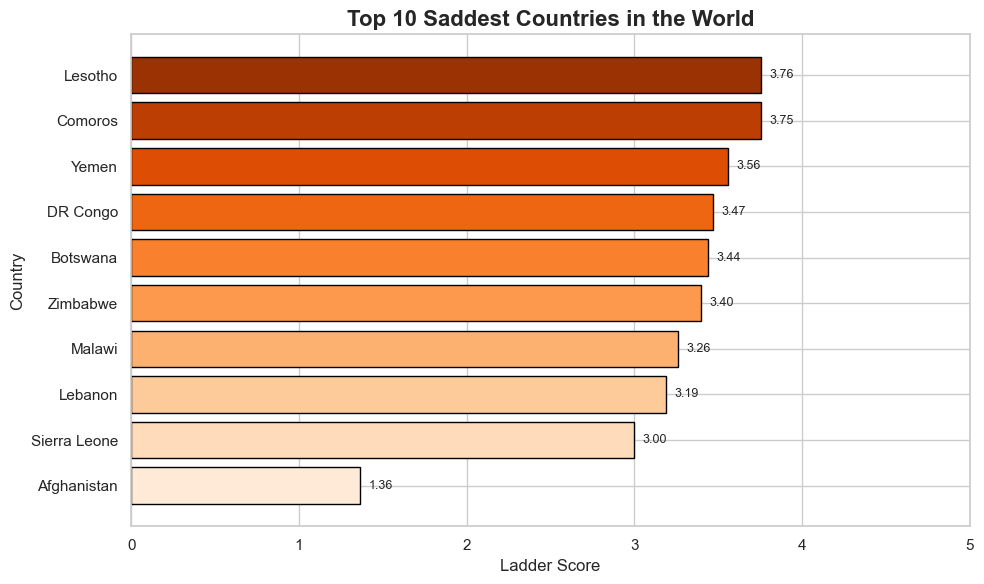

In [9]:
sns.set_theme(style="whitegrid")
colors = sns.color_palette("Oranges", len(dataset_top))
plt.figure(figsize=(10, 6))

bars = plt.barh(dataset_bottom["Country"], dataset_bottom["Ladder Score"], color=colors, edgecolor="black")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center', fontsize=9)

plt.title("Top 10 Saddest Countries in the World", fontsize=16, weight='bold')

plt.xlabel("Ladder Score", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xlim(0, 5)


plt.tight_layout()
plt.show()